<a href="https://colab.research.google.com/github/landges/automatic-octo-machine/blob/master/graph_metods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Теория Граф. Методов


In [0]:
!pip install prettytable

ПЗ-1

In [0]:
import re
import numpy as np
import networkx
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import math
drive.mount('/content/drive')
import prettytable

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


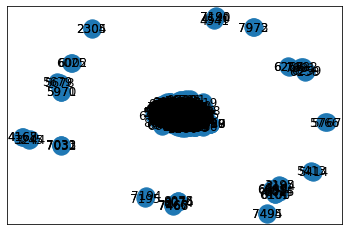

In [0]:

f = open('/content/drive/My Drive/Colab Notebooks/graph_metods/Wiki-Vote.txt')
l=f.read()
p=re.findall("(\d{1,}\t\d{1,})",l)
ne=re.findall("(Nodes: \d{1,}|Edges: \d{1,})",l)
nodes = float(re.findall('\d{1,}', ne[0])[0])
edges = float(re.findall('\d{1,}', ne[1])[0])

p = [i.split('\t') for i in p]
WikiVote_edges=[[int(i[0]), int(i[1])] for i in p]
#print('Пороговое значение: ',np.log(nodes)/(nodes-1))
#print('Текущее значение: ', edges/(nodes*(nodes-1)))
#print('Текущее значение для слабых: ', 2*edges/(nodes))
#print(max(p))
#print(n[:100])

g=networkx.read_edgelist('/content/drive/My Drive/Colab Notebooks/graph_metods/Wiki-Vote.txt', comments='#', delimiter='\t')
networkx.drawing.nx_pylab.draw_networkx(g)
plt.show()                        

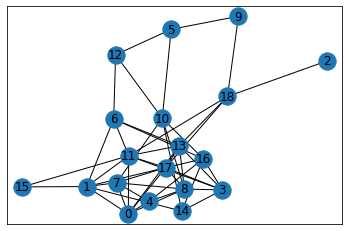


0.16357994328702447
0.7719298245614036
0.3859649122807018
 
0.16357994328702447
0.7573099415204678
1.5146198830409356


In [0]:

gr = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/graph_metods/Дружба.xlsx')
graph=gr.values[:-1,:-1]
connectivity_list = []
for i in range(graph.shape[0]):
    for j in range(graph.shape[1]):
        if graph[i,j]==1:
            connectivity_list.append([i,j])
# handle = open(r'E:\TGP_ShIva\connectivity_list_friendship.txt', 'w')
# for i in connectivity_list:
#     handle.write(str(i[0]) + ' ' + str(i[1])+'\n')
# handle.close()
avg_pow=sum(sum(graph))/19
g=networkx.read_edgelist('/content/drive/My Drive/Colab Notebooks/graph_metods/connectivity_list_dr.txt', comments='#', delimiter=' ')
networkx.drawing.nx_pylab.draw_networkx(g)
plt.show()  
print(g)
print(math.log(19)/18)
print(avg_pow/18)
print(avg_pow/36)
print(' ')

gr = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/graph_metods/Дни рождения.xlsx')
graph=gr.values[:-1,:-1]
connectivity_list = []
for i in range(graph.shape[0]):
    for j in range(graph.shape[1]):
        if graph[i,j]==1:
            connectivity_list.append([i,j])
# handle = open(r'E:\TGP_ShIva\connectivity_list_friendship.txt', 'w')
# for i in connectivity_list:
#     handle.write(str(i[0]) + ' ' + str(i[1])+'\n')
# handle.close()
avg_pow=sum(sum(graph))/19
print(math.log(19)/18)
print(avg_pow/18)
print(avg_pow/18*2)


# Модель случайного графа
Рассматриваем количество компонент связности от значения вероятности построения случайного графа.


1.   При p < 1/n - получим множество несвязанных вершин
2.   При p = 1/n - будут компоненты связности ln(n)
3.   При p из отрезка [1/n, log(n)/(n -1 )] будет одна большая компонента. и в случае, когда вероятность близка к левому краю отрезка, несколько изолированных вершин.
4.   При p > log(n)/(n -1) получим одну большую компоненту связности



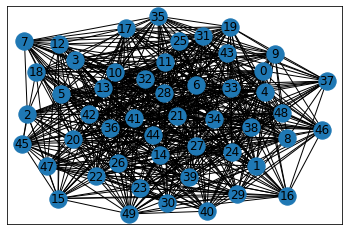

In [0]:
col_nodes = 50

def random_graf(p):
    edges = []
    for i in range(col_nodes):
        for j in range(i,col_nodes):
            if np.random.rand() < p and i!=j:
                edges.append([i,j])
            else:
                edges.append([i,i])
    return edges

edges=random_graf(0.5)
g = networkx.Graph()
g.add_edges_from(edges)               
networkx.drawing.nx_pylab.draw_networkx(g, color='blue')

# random_graf(0.5 * 1/col_nodes)
#random_graf(1/col_nodes)
# random_graf((p + np.log(col_nodes)/(col_nodes -1 )) / 3)
#random_graf(1.5 * np.log(col_nodes)/(col_nodes -1 ))


# Коэффициент кластеризации сети

![alt text](https://pidruchniki.com/imag/inform/snar_msls/image014.jpg)

где Ci=2*ei/ki(ki-1) 

ei - число ребер между всеми соседними вершинами,

ki - количесвто смежных вершин.

In [0]:
def cluster_cof (graf):
    claster_list=networkx.clustering(graf) # словарь коофицентов кластеризации
    clasters=claster_list.values()
    return sum(clasters)/graf.number_of_nodes()
    
def contains(list_big,list2_little):
    for i in list_big:
        if i==list2_little:
            return True
    return False

def gen_list_graf(p, col_nodes):
    edges = []
    for i in range(col_nodes):
        for j in range(i,col_nodes):
            if np.random.rand() < p and i!=j:
                edges.append([i,j])
            else:
                edges.append([i,i])
    return edges


def cluster_cof_node (index_node, list_edges):
    list_edges=[sorted(t) for t in list_edges]
    list1 = [i.copy() for i in list_edges]
    list_edges_with_index = []
    for i in list1:
        if i.__contains__(index_node):
            i.remove(index_node)
            list_edges_with_index.append(i)
    count_nodes = len(list_edges_with_index)
    neibpor=[t[0] for t in list_edges_with_index]
    neibpor.sort()
    list_edges_naibour = []
    for i in range(len(neibpor)):
        for j in range(i,len(neibpor)):
            if i != j:
                list_edges_naibour.append([neibpor[i],neibpor[j]])
    count_a = 0
    for both in list_edges_naibour:
        if contains(list_edges,both):
            count_a=count_a+1
    if count_nodes - 1 == 0 or count_nodes == 0:
        return 0
    return count_a/(count_nodes*(count_nodes - 1))     

def cluster_cof_new(edges,nodes):
    clusters=[cluster_cof_node(i,edges) for i in range(1,nodes + 1 )]
    return sum(clusters)/nodes

def coef_claster_randomgraph(nodes):
  p=np.log(nodes)/(nodes -1 )
  edges=gen_list_graf(p,nodes)
  cl=cluster_cof_new(edges,nodes)
  return p,cl

table_clasters=[]

WikiVote_graph=networkx.read_edgelist('/content/drive/My Drive/Colab Notebooks/graph_metods/Wiki-Vote.txt', comments='#', delimiter='\t')
wiki_random_graph=networkx.Graph()
p_wiki=np.log(7115)/(7115 -1 )
wiki_random_graph.add_edges_from(gen_list_graf(p_wiki,7115))
cl=cluster_cof(wiki_random_graph)
table_clasters.append(["WikiVote",cluster_cof(WikiVote_graph),p_wiki,cl])

dr=networkx.read_edgelist('/content/drive/My Drive/Colab Notebooks/graph_metods/connectivity_list_dr.txt')
table_clasters.append(["DR",cluster_cof(dr)]+list(coef_claster_randomgraph(19)))
fr=networkx.read_edgelist('/content/drive/My Drive/Colab Notebooks/graph_metods/connectivity_list_friendship.txt')
table_clasters.append(['FR',cluster_cof(fr)]+list(coef_claster_randomgraph(19)))
table = prettytable.PrettyTable(['name','coef_cl','p','random_graph_cl_coef'])
for row in table_clasters:
  table.add_row(row)
print(table)


+----------+---------------------+-----------------------+-----------------------+
|   name   |       coef_cl       |           p           |  random_graph_cl_coef |
+----------+---------------------+-----------------------+-----------------------+
| WikiVote | 0.14089784589308738 | 0.0012468316714259141 | 0.0012732224287739713 |
|    DR    | 0.37777777777777777 |  0.16357994328702447  |   0.4182839606214219  |
|    FR    | 0.44335839598997495 |  0.16357994328702447  |   0.4235560277355943  |
+----------+---------------------+-----------------------+-----------------------+


In [0]:
ed=dr.edges()
edg=[]
for tup in ed:
  tu=list(tup)
  tu[0]=int(tup[0])
  tu[1]=int(tup[1])
  edg.append(tu)

print(edg)

[[0, 4], [0, 7], [0, 8], [0, 13], [0, 17], [0, 1], [0, 11], [4, 7], [4, 8], [4, 16], [7, 1], [7, 8], [7, 10], [7, 17], [8, 3], [8, 10], [8, 13], [8, 17], [13, 3], [13, 6], [13, 11], [13, 17], [13, 18], [17, 1], [17, 3], [17, 11], [17, 16], [17, 18], [1, 11], [1, 14], [1, 15], [1, 6], [11, 3], [11, 6], [11, 15], [11, 18], [14, 3], [14, 10], [14, 16], [3, 16], [5, 10], [5, 12], [5, 9], [10, 12], [10, 16], [12, 6], [6, 16], [9, 18], [18, 2]]
